<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/ArvoreDeDecisao-IA/blob/main/Questao2/CondicaoDeObesidade_C43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#algoritimo C4.3
import pandas as pd # para trabalhar com a planilha
import numpy as np # para calculos 
base_risco_obesidade = pd.read_csv('Condicao_de_obesidade.csv')
base_risco_obesidade

,Come,Vegetariano,Idade,Diabetico,Classe
0,pouco,sim,velho,sim,magro
1,medio,sim,velho,nao,magro
2,muito,nao,velho,sim,gordo
3,pouco,nao,velho,nao,magro
4,medio,nao,jovem,sim,gordo
5,pouco,sim,jovem,nao,magro
6,muito,nao,velho,nao,gordo
7,medio,nao,jovem,sim,gordo


In [23]:
#Pre-processamento dos dados
x_risco_obesidade = base_risco_obesidade.iloc[:, 0:4].values
x_risco_obesidade #mostra todos os atributos com excessao da clase

array([['pouco', 'sim', 'velho', 'sim'],
       ['medio', 'sim', 'velho', 'nao'],
       ['muito', 'nao', 'velho', 'sim'],
       ['pouco', 'nao', 'velho', 'nao'],
       ['medio', 'nao', 'jovem', 'sim'],
       ['pouco', 'sim', 'jovem', 'nao'],
       ['muito', 'nao', 'velho', 'nao'],
       ['medio', 'nao', 'jovem', 'sim']], dtype=object)

In [24]:
#Pre-processamento dos dados
y_risco_obesidade = base_risco_obesidade.iloc[:, 4].values
y_risco_obesidade #mostrar classe

array(['magro', 'magro', 'gordo', 'magro', 'gordo', 'magro', 'gordo',
       'gordo'], dtype=object)

In [25]:
#Pre-processamento dos dados
from sklearn.preprocessing import LabelEncoder
label_encoder_come = LabelEncoder()
label_encoder_vegetariano = LabelEncoder()
label_encoder_idade = LabelEncoder()
label_encoder_diabetico = LabelEncoder()

In [26]:
#Pre-processamento dos dados
x_risco_obesidade[:, 0] = label_encoder_come.fit_transform(x_risco_obesidade[:, 0])
x_risco_obesidade[:, 1] = label_encoder_vegetariano.fit_transform(x_risco_obesidade[:, 1])
x_risco_obesidade[:, 2] = label_encoder_idade.fit_transform(x_risco_obesidade[:, 2])
x_risco_obesidade[:, 3] = label_encoder_diabetico.fit_transform(x_risco_obesidade[:, 3])

In [27]:
x_risco_obesidade

array([[2, 1, 1, 1],
       [0, 1, 1, 0],
       [1, 0, 1, 1],
       [2, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)

In [28]:
# salvando os dados pre-processados
import pickle
with open('risco_obesidade.pkl', 'wb') as f:
  pickle.dump([x_risco_obesidade, y_risco_obesidade], f)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
import pickle
with open('risco_obesidade.pkl', 'rb') as f:  # abrindo o arquivo já pre-processado
  x_risco_obesidade, y_risco_obesidade = pickle.load(f)


In [31]:
x_risco_obesidade

array([[2, 1, 1, 1],
       [0, 1, 1, 0],
       [1, 0, 1, 1],
       [2, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)

In [32]:
y_risco_obesidade

array(['magro', 'magro', 'gordo', 'magro', 'gordo', 'magro', 'gordo',
       'gordo'], dtype=object)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_risco_obesidade, y_risco_obesidade, test_size = 0.25, random_state = 0)

In [34]:
x_risco_obesidade


array([[2, 1, 1, 1],
       [0, 1, 1, 0],
       [1, 0, 1, 1],
       [2, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)

In [35]:
x_train

array([[0, 1, 1, 0],
       [0, 0, 0, 1],
       [2, 0, 1, 0],
       [2, 1, 1, 1],
       [2, 1, 0, 0],
       [0, 0, 0, 1]], dtype=object)

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_leaf_nodes=None, min_impurity_decrease=0)

In [37]:
clf = model.fit(x_train, y_train)

[Text(0.6, 0.8333333333333334, 'Vegetariano <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = magro'),
 Text(0.4, 0.5, 'Come <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = gordo'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = gordo'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = magro'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = magro')]

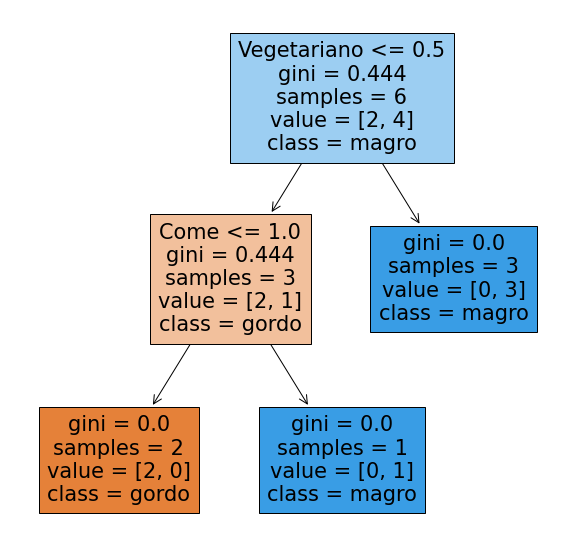

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['Come', 'Vegetariano', 'Idade', 'Diabetico']
figura, eixos = plt.subplots(nrows = 1, ncols =1, figsize=(10,10))
tree.plot_tree(clf, feature_names=previsores, class_names = clf.classes_, filled= True)

In [39]:
y_pred = clf.predict(x_test)


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# validação
akurasi = classification_report(y_test, y_pred)
print('Akurasi:', akurasi)

Akurasi:               precision    recall  f1-score   support

       gordo       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [41]:
akurasi = accuracy_score(y_test, y_pred)
print('%d porcento' %(akurasi*100))

100 porcento


In [46]:
#espaço para realizar testes:
#Entradas em numeros para as instancias:
#come
# 0 ->  medio
# 1 ->  muito
# 2 ->  pouco


#Pra vegetariano
# 0 ->  nao
# 1 ->  sim

#Pra idade
# 0 ->  jovem
# 1 ->  velho


#Pra diabetico
# 0 ->  nao
# 1 ->  sim

#exemplo para [medio, sim, velho, sim]
previsores= clf.predict([[0,1,1, 1]])
previsores

array(['magro'], dtype=object)